In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Data Loading: CustomerDemographic

custdemo = pd.read_excel('KPMG_clean_data.xlsx', sheet_name='CustomerDemographic', 
                             skiprows = 0, header=0)
custdemo_bk = custdemo.copy()

# Data Loading: Transactions

transactions = pd.read_excel('KPMG_clean_data.xlsx', sheet_name='Transactions', 
                             skiprows = 0, header=0)
transactions_bk = transactions.copy()


# Data Loading: CustomerAddress

custadd = pd.read_excel('KPMG_clean_data.xlsx', sheet_name='CustomerAddress', 
                             skiprows = 0, header=0)
custadd_bk = custadd.copy()

In [3]:
# Data Loading: Test Dataset -NewCustomerList
NewCustomer = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList', 
                             skiprows = 1, header=0)
NewCustomer_bk = NewCustomer.copy()
NewCustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.41,0.5125,0.640625,0.544531,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.02,1.0200,1.275000,1.083750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.46,0.4600,0.460000,0.460000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.06,1.3250,1.325000,1.325000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125


In [4]:
NewCustomer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [5]:
NewCustomer.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

---

# Find the variables for modeling

In [6]:
custdemo.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_group'],
      dtype='object')

In [7]:
custdemo.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11,64,Old-aged Adults
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16,37,Middle-aged Adults
2,3,Male,61,1954-01-20,Property,Mass Customer,N,Yes,15,63,Old-aged Adults
3,4,Male,33,1961-10-03,IT,Mass Customer,N,No,7,56,Old-aged Adults
4,5,Female,56,1977-05-13,Unspecified,Affluent Customer,N,Yes,8,40,Middle-aged Adults


In [8]:
custdemo_x = custdemo[['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'job_industry_category','wealth_segment',\
                       'deceased_indicator', 'owns_car', 'tenure', 'age']]
custdemo_x.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Female,93,Health,Mass Customer,N,Yes,11,64
1,2,Male,81,Financial Services,Mass Customer,N,Yes,16,37
2,3,Male,61,Property,Mass Customer,N,Yes,15,63
3,4,Male,33,IT,Mass Customer,N,No,7,56
4,5,Female,56,Unspecified,Affluent Customer,N,Yes,8,40


In CustomerDemographic file, I will chose gender, past_3_years_bike_related_purchases, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure, age.

In [9]:
custadd.columns

Index(['customer_id', 'postcode', 'state', 'country', 'property_valuation'], dtype='object')

In [10]:
custadd.head()

,customer_id,postcode,state,country,property_valuation
0,1,2016,NSW,Australia,10
1,2,2153,NSW,Australia,10
2,4,4211,QLD,Australia,9
3,5,2448,NSW,Australia,4
4,6,3216,VIC,Australia,9


In [11]:
custadd_x = custadd[['customer_id', 'state']]
custadd_x.head()

,customer_id,state
0,1,NSW
1,2,NSW
2,4,QLD
3,5,NSW
4,6,VIC


In Customer Address file, I will chose state only.

#### Combine customer demographic and customer address selected columns

In [12]:
merged_cust = pd.merge(left=custdemo_x, right=custadd_x, left_on='customer_id', right_on='customer_id')
merged_cust.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,state
0,1,Female,93,Health,Mass Customer,N,Yes,11,64,NSW
1,2,Male,81,Financial Services,Mass Customer,N,Yes,16,37,NSW
2,4,Male,33,IT,Mass Customer,N,No,7,56,QLD
3,5,Female,56,Unspecified,Affluent Customer,N,Yes,8,40,NSW
4,6,Male,35,Retail,High Net Worth,N,Yes,13,51,VIC


In [13]:
merged_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3909 non-null   int64 
 1   gender                               3909 non-null   object
 2   past_3_years_bike_related_purchases  3909 non-null   int64 
 3   job_industry_category                3909 non-null   object
 4   wealth_segment                       3909 non-null   object
 5   deceased_indicator                   3909 non-null   object
 6   owns_car                             3909 non-null   object
 7   tenure                               3909 non-null   int64 
 8   age                                  3909 non-null   int64 
 9   state                                3909 non-null   object
dtypes: int64(4), object(6)
memory usage: 335.9+ KB


In [14]:
merged_cust_col = merged_cust.columns.tolist()
merged_cust_col

['customer_id',
 'gender',
 'past_3_years_bike_related_purchases',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'age',
 'state']

# Find the target values for modeling

I will use 'list_price' minus 'standard_cost' as a company_profit. Then, group by each customer id.

In [15]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [16]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226


#### Only calculate the completed orders (order_status = Approved)

In [17]:
transactions = transactions.query("order_status == 'Approved'")

In [18]:
transactions['profit'] = transactions.list_price - transactions.standard_cost

In [19]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18842 entries, 0 to 19011
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           18842 non-null  int64         
 1   product_id               18842 non-null  int64         
 2   customer_id              18842 non-null  int64         
 3   transaction_date         18842 non-null  datetime64[ns]
 4   online_order             18842 non-null  int64         
 5   order_status             18842 non-null  object        
 6   brand                    18842 non-null  object        
 7   product_line             18842 non-null  object        
 8   product_class            18842 non-null  object        
 9   product_size             18842 non-null  object        
 10  list_price               18842 non-null  float64       
 11  standard_cost            18842 non-null  float64       
 12  product_first_sold_date  18842 n

In [20]:
sum_profit = transactions[['customer_id','profit']].groupby(['customer_id']).sum()

#### Combine customer variables and target value (transaction profit)

In [21]:
df_model = pd.merge(left=merged_cust, right=sum_profit, left_on='customer_id', right_on='customer_id')
df_model.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,state,profit
0,1,Female,93,Health,Mass Customer,N,Yes,11,64,NSW,3018.09
1,2,Male,81,Financial Services,Mass Customer,N,Yes,16,37,NSW,2226.26
2,4,Male,33,IT,Mass Customer,N,No,7,56,QLD,220.57
3,5,Female,56,Unspecified,Affluent Customer,N,Yes,8,40,NSW,2394.94
4,6,Male,35,Retail,High Net Worth,N,Yes,13,51,VIC,3946.55


In [22]:
df_model.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
state                                  0
profit                                 0
dtype: int64

In [23]:
df_out = df_model.copy()

---

# Data transformation

Before we head into the modeling, we need to convert the categorical data into a numeric data type. This is because the scikit-learn package only allowed numeric data type for the modeling.

In [24]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409 entries, 0 to 3408
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3409 non-null   int64  
 1   gender                               3409 non-null   object 
 2   past_3_years_bike_related_purchases  3409 non-null   int64  
 3   job_industry_category                3409 non-null   object 
 4   wealth_segment                       3409 non-null   object 
 5   deceased_indicator                   3409 non-null   object 
 6   owns_car                             3409 non-null   object 
 7   tenure                               3409 non-null   int64  
 8   age                                  3409 non-null   int64  
 9   state                                3409 non-null   object 
 10  profit                               3409 non-null   float64
dtypes: float64(1), int64(4), objec

__1. Gender__

female: 1, male: 0

In [25]:
df_model['gender'] = df_model['gender'].map({'Male': 0,'Female': 1})
df_model['gender'].value_counts()

1    1755
0    1654
Name: gender, dtype: int64

__2. job_industry_category__

Manufacturing\
Financial Services\
Unspecified\
Health\
Retail\
Property\
IT\
Entertainment\
Argiculture\
Telecommunications


In [26]:
# Transfer to one hot vector type
industry=pd.get_dummies(df_model['job_industry_category'],columns='job_industry_category',prefix='industry')
df_model=pd.concat([df_model, industry], axis=1)
df_model.drop(['job_industry_category'],axis=1,inplace= True)
df_model.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'age',
       'state', 'profit', 'industry_Argiculture', 'industry_Entertainment',
       'industry_Financial Services', 'industry_Health', 'industry_IT',
       'industry_Manufacturing', 'industry_Property', 'industry_Retail',
       'industry_Telecommunications', 'industry_Unspecified'],
      dtype='object')

__3. wealth_segment__

Mass Customer\
Affluent Customer\
High Net Worth


In [27]:
# Transfer to one hot vector type
w=pd.get_dummies(df_model['wealth_segment'],columns='wealth_segment',prefix='wealth_segment')
df_model=pd.concat([df_model, w], axis=1)
df_model.drop(['wealth_segment'],axis=1,inplace= True)
df_model.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'state', 'profit',
       'industry_Argiculture', 'industry_Entertainment',
       'industry_Financial Services', 'industry_Health', 'industry_IT',
       'industry_Manufacturing', 'industry_Property', 'industry_Retail',
       'industry_Telecommunications', 'industry_Unspecified',
       'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth',
       'wealth_segment_Mass Customer'],
      dtype='object')

__4. deceased_indicator__

N: 1, Y: 0


In [28]:
df_model['deceased_indicator'] = df_model['deceased_indicator'].map({'Y': 0,'N': 1})
df_model['deceased_indicator'].value_counts()

1    3408
0       1
Name: deceased_indicator, dtype: int64

__5. owns_car__

Y: 1, N: 0

In [29]:
df_model['owns_car'] = df_model['owns_car'].map({'No': 0,'Yes': 1})
df_model['owns_car'].value_counts()

1    1722
0    1687
Name: owns_car, dtype: int64

__6. state__

['NSW', 'QLD', 'VIC']

In [30]:
# Transfer to one hot vector type
s=pd.get_dummies(df_model['state'],columns='state',prefix='state')
df_model=pd.concat([df_model, s], axis=1)
df_model.drop(['state'],axis=1,inplace= True)
df_model.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'profit',
       'industry_Argiculture', 'industry_Entertainment',
       'industry_Financial Services', 'industry_Health', 'industry_IT',
       'industry_Manufacturing', 'industry_Property', 'industry_Retail',
       'industry_Telecommunications', 'industry_Unspecified',
       'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth',
       'wealth_segment_Mass Customer', 'state_NSW', 'state_QLD', 'state_VIC'],
      dtype='object')

In [31]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409 entries, 0 to 3408
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3409 non-null   int64  
 1   gender                               3409 non-null   int64  
 2   past_3_years_bike_related_purchases  3409 non-null   int64  
 3   deceased_indicator                   3409 non-null   int64  
 4   owns_car                             3409 non-null   int64  
 5   tenure                               3409 non-null   int64  
 6   age                                  3409 non-null   int64  
 7   profit                               3409 non-null   float64
 8   industry_Argiculture                 3409 non-null   uint8  
 9   industry_Entertainment               3409 non-null   uint8  
 10  industry_Financial Services          3409 non-null   uint8  
 11  industry_Health               

In [32]:
df_model.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'profit',
       'industry_Argiculture', 'industry_Entertainment',
       'industry_Financial Services', 'industry_Health', 'industry_IT',
       'industry_Manufacturing', 'industry_Property', 'industry_Retail',
       'industry_Telecommunications', 'industry_Unspecified',
       'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth',
       'wealth_segment_Mass Customer', 'state_NSW', 'state_QLD', 'state_VIC'],
      dtype='object')

In [33]:
df_model.shape

(3409, 24)

In [34]:
df_model.head(10)

,customer_id,gender,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,profit,industry_Argiculture,industry_Entertainment,...,industry_Property,industry_Retail,industry_Telecommunications,industry_Unspecified,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,state_NSW,state_QLD,state_VIC
0,1,1,93,1,1,11,64,3018.09,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2,0,81,1,1,16,37,2226.26,0,0,...,0,0,0,0,0,0,1,1,0,0
2,4,0,33,1,0,7,56,220.57,0,0,...,0,0,0,0,0,0,1,0,1,0
3,5,1,56,1,1,8,40,2394.94,0,0,...,0,0,0,1,1,0,0,1,0,0
4,6,0,35,1,1,13,51,3946.55,0,0,...,0,1,0,0,0,1,0,0,0,1
5,7,1,6,1,1,11,41,220.11,0,0,...,0,0,0,0,1,0,0,1,0,0
6,8,0,31,1,0,7,55,5364.39,0,0,...,0,0,0,1,0,0,1,1,0,0
7,9,1,97,1,1,8,44,2353.11,1,0,...,0,0,0,0,1,0,0,1,0,0
8,11,0,99,1,0,9,63,3091.56,0,0,...,1,0,0,0,0,0,1,0,0,1
9,12,0,58,1,0,8,23,3540.03,0,0,...,0,0,0,0,0,0,1,0,1,0


### Find the proper features for modeling
I will choose the features which have a high correlation with the target variable.

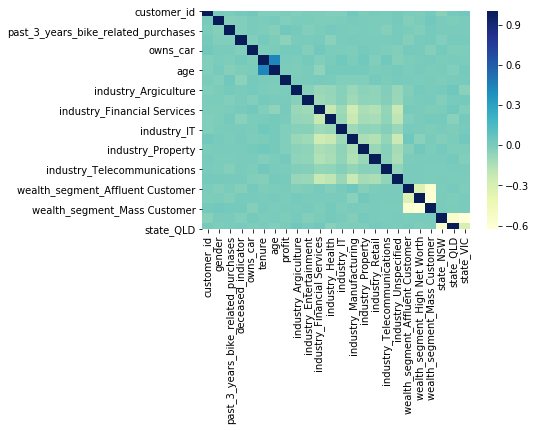

In [35]:
ax = sns.heatmap(df_model.corr(), cmap="YlGnBu")

In [36]:
df_model[df_model.columns[1:]].corr()['profit'][:].sort_values(ascending=False)

profit                                 1.000000
past_3_years_bike_related_purchases    0.024937
industry_Retail                        0.023402
owns_car                               0.012829
industry_Financial Services            0.008731
state_VIC                              0.008335
industry_Unspecified                   0.007709
state_QLD                              0.004334
industry_Health                        0.004117
wealth_segment_Mass Customer           0.002567
tenure                                 0.001641
industry_Entertainment                 0.001614
wealth_segment_Affluent Customer      -0.000642
age                                   -0.000970
wealth_segment_High Net Worth         -0.002309
industry_Telecommunications           -0.006067
industry_Argiculture                  -0.006730
state_NSW                             -0.010819
industry_Manufacturing                -0.013841
industry_IT                           -0.016334
industry_Property                     -0

#### Remove the columns that highly correlated with other columns

In [37]:
# Calculate correlation between all columns and remove highly correlated ones 
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.head(10))

In [38]:
correlation(df_model.drop(['profit','customer_id'], axis = 1), 0.8)

   gender  past_3_years_bike_related_purchases  deceased_indicator  owns_car  \
0       1                                   93                   1         1   
1       0                                   81                   1         1   
2       0                                   33                   1         0   
3       1                                   56                   1         1   
4       0                                   35                   1         1   
5       1                                    6                   1         1   
6       0                                   31                   1         0   
7       1                                   97                   1         1   
8       0                                   99                   1         0   
9       0                                   58                   1         0   

   tenure  age  industry_Argiculture  industry_Entertainment  \
0      11   64                     0                   

In [39]:
df_model.shape

(3409, 24)

# Modeling - Regression

The reason I used Regressions is to predict profit of new customers.

#### Linear Regression

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_model.drop(['profit','customer_id'], axis = 1)
y = df_model['profit']

X_train_mg, X_test_mg, y_train, y_test = train_test_split(X,y, random_state = 0) 

In [41]:
scaler = StandardScaler() 

X_imputed_train = scaler.fit_transform(X_train_mg)
X_imputed_test  = scaler.transform(X_test_mg)

0. gender, Score: -13.629085
1. past_3_years_bike_related_purchases, Score: 52.276755
2. deceased_indicator, Score: -87.783290
3. owns_car, Score: 36.208426
4. tenure, Score: 61.927663
5. age, Score: -47.793054
6. industry_Argiculture, Score: -944663918233332.625000
7. industry_Entertainment, Score: -1038955591610208.125000
8. industry_Financial Services, Score: -2176941677177675.250000
9. industry_Health, Score: -1960237194365908.750000
10. industry_IT, Score: -1038955591610290.000000
11. industry_Manufacturing, Score: -2250990827666192.250000
12. industry_Property, Score: -1345804223679857.250000
13. industry_Retail, Score: -1571622177057812.750000
14. industry_Telecommunications, Score: -706333569768582.375000
15. industry_Unspecified, Score: -2041009314464753.250000
16. wealth_segment_Affluent Customer, Score: 257461329516567.812500
17. wealth_segment_High Net Worth, Score: 262167226644157.406250
18. wealth_segment_Mass Customer, Score: 297843452540425.875000
19. state_NSW, Score: 

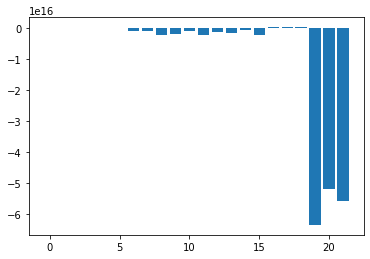

In [42]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_imputed_train, y_train )

# get importance
importance = lreg.coef_
# summarize feature importance
X_label = X.columns.tolist()

for i,v in enumerate(importance):
    print('{}. {}, Score: {:f}'.format(i, X_label[i], v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [43]:
print('Train dataset Score: {}\nTest  dataset Score: {}'.format(lreg.score(X_imputed_train, y_train), 
                                                                lreg.score(X_imputed_test, y_test)))

Train dataset Score: 0.00757425811702761
Test  dataset Score: -0.013242221440234125


#### Lasso Regression

In [44]:
from sklearn.linear_model import Lasso

lasso_range = [0.01, 10, 35]
for r in lasso_range:
    lasso = Lasso(alpha=r)
    lasso.fit(X_imputed_train,y_train)
    Lasso_train_score=lasso.score(X_imputed_train, y_train)
    Lasso_test_score=lasso.score(X_imputed_test, y_test)
    Lasso_coeff_used = np.sum(lasso.coef_!=0)
    print('Alpha: {0}'.format(r))
    print('Lasso training score:', Lasso_train_score)
    print('Lasso test score:    ', Lasso_test_score)
    print('Lasso number of features used: ', Lasso_coeff_used)
    print('\n')

Alpha: 0.01
Lasso training score: 0.008309583680730204
Lasso test score:     -0.012191575641649965
Lasso number of features used:  20


Alpha: 10
Lasso training score: 0.007705986211976046
Lasso test score:     -0.007432469320064915
Lasso number of features used:  16


Alpha: 35
Lasso training score: 0.004072898705538064
Lasso test score:     -0.001665202292818302
Lasso number of features used:  6




/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4000950.647171974, tolerance: 778036.1315719
  positive)


#### Ridge Regression

In [45]:
from sklearn.linear_model import Ridge

ridge_range = [0.5, 15, 35]
for r in ridge_range:
    ridge = Ridge(alpha=r)
    ridge.fit(X_imputed_train, y_train)
    Ridge_train_score = ridge.score(X_imputed_train, y_train)
    Ridge_test_score = ridge.score(X_imputed_test, y_test)
    Ridge_coeff_used = np.sum(ridge.coef_!=0)
    print('Alpha: {0}'.format(r))
    print('Ridge training score:', Ridge_train_score)
    print('Ridge test score:    ', Ridge_test_score)
    print('number of features used - Ridge: ', Ridge_coeff_used)
    print('\n')

Alpha: 0.5
Ridge training score: 0.008309583956489064
Ridge test score:     -0.012192738537815329
number of features used - Ridge:  22


Alpha: 15
Ridge training score: 0.00830924159761881
Ridge test score:     -0.012063073750977038
number of features used - Ridge:  22


Alpha: 35
Ridge training score: 0.008307753886764413
Ridge test score:     -0.011888417635835147
number of features used - Ridge:  22




## Strategy Adjustment!

After I used Linear Regression, Ridge Regression, and Lasso Regression. I realized regression methods are not sutable to this dataset. Therefore, I am going to use clustering instead.

## Clustering

In [46]:
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc

In [47]:
df_model.head()

,customer_id,gender,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,profit,industry_Argiculture,industry_Entertainment,...,industry_Property,industry_Retail,industry_Telecommunications,industry_Unspecified,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,state_NSW,state_QLD,state_VIC
0,1,1,93,1,1,11,64,3018.09,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2,0,81,1,1,16,37,2226.26,0,0,...,0,0,0,0,0,0,1,1,0,0
2,4,0,33,1,0,7,56,220.57,0,0,...,0,0,0,0,0,0,1,0,1,0
3,5,1,56,1,1,8,40,2394.94,0,0,...,0,0,0,1,1,0,0,1,0,0
4,6,0,35,1,1,13,51,3946.55,0,0,...,0,1,0,0,0,1,0,0,0,1


In [48]:
# Prepare X
X_cluster = df_model.drop(['customer_id'], axis = 1)

In [49]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_cluster) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [50]:
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.232151,0.367556,0.004096,0.236692,0.013192,0.451398,-0.002621,-0.041571,-0.046266,-0.119150,...,-0.064322,-0.074555,-0.032813,-0.106020,-0.136417,-0.140197,0.239766,0.223444,-0.124721,-0.138901
1,-0.290743,0.315611,0.004835,0.279370,0.264303,-0.063204,-0.131444,-0.049067,-0.054608,0.566479,...,-0.075920,-0.087998,-0.038730,-0.125137,-0.161015,-0.165476,0.282999,0.263733,-0.147209,-0.163947
2,-0.161183,-0.087187,0.002680,-0.158091,-0.101683,0.197471,-0.253106,-0.027202,-0.030274,-0.077966,...,-0.042089,-0.048784,-0.021471,-0.069374,-0.089264,-0.091738,0.156890,-0.167464,0.300022,-0.090889
3,0.256646,0.064927,0.004529,0.261666,-0.125199,0.002826,-0.097505,-0.045958,-0.051148,-0.131723,...,-0.071109,-0.082421,-0.036275,0.596291,0.463424,-0.154990,-0.263669,0.247020,-0.137880,-0.153557
4,-0.212678,-0.100629,0.003537,0.204359,0.084169,0.179824,0.107826,-0.035893,-0.039946,-0.102874,...,-0.055536,0.662246,-0.028331,-0.091538,-0.117782,0.352172,-0.205923,-0.220966,-0.107683,0.355458


In [51]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

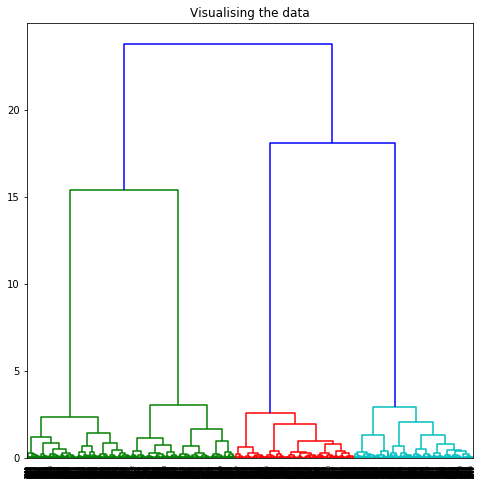

In [52]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

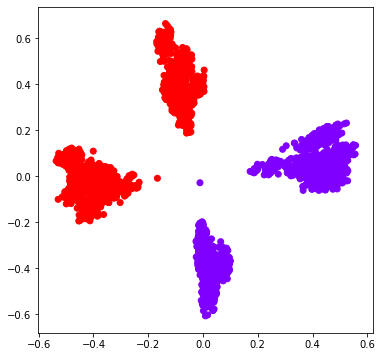

In [53]:
# K = 2
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

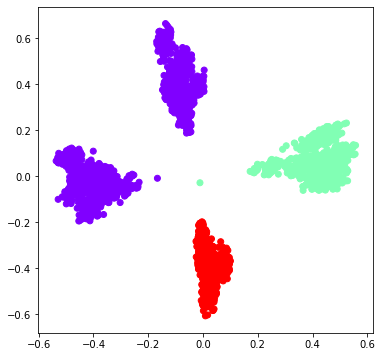

In [54]:
# K = 3
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

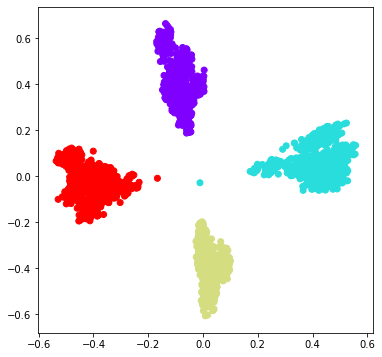

In [55]:
# K = 4
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

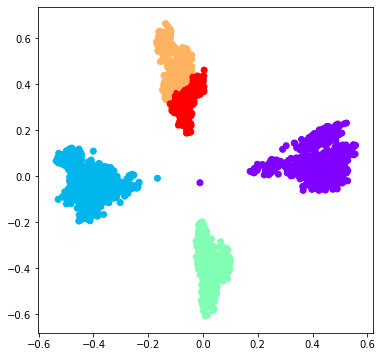

In [56]:
# K = 5
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

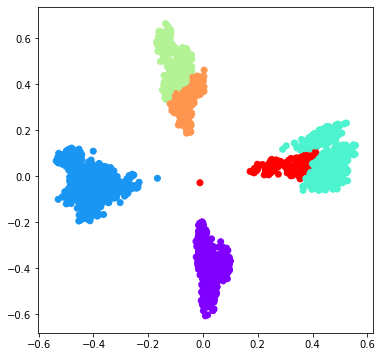

In [57]:
# K = 6
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

#### Evaluating the different models and Visualizing the results.

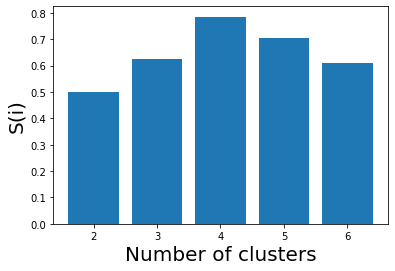

In [58]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

According to the plot above, the proper cluster number is 4.
I will predict the new customers based on cluster equal 4

### Assign Labels to the old customers table

In [59]:
df_model['cluster'] = ac4.fit_predict(X_principal)
df_out['cluster'] = ac4.fit_predict(X_principal)

In [60]:
bins = [0, 16, 30, 45, 1000]
df_out['age_group'] = pd.cut(df_out['age'], bins)
labels = ["Child", "Young Adults", "Middle-aged Adults", "Old-aged Adults"]
df_out['age_group'] = pd.cut(df_out['age'], bins=bins, labels=labels)

In [61]:
df_model.head()

,customer_id,gender,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,profit,industry_Argiculture,industry_Entertainment,...,industry_Retail,industry_Telecommunications,industry_Unspecified,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,state_NSW,state_QLD,state_VIC,cluster
0,1,1,93,1,1,11,64,3018.09,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2,0,81,1,1,16,37,2226.26,0,0,...,0,0,0,0,0,1,1,0,0,1
2,4,0,33,1,0,7,56,220.57,0,0,...,0,0,0,0,0,1,0,1,0,0
3,5,1,56,1,1,8,40,2394.94,0,0,...,0,0,1,1,0,0,1,0,0,2
4,6,0,35,1,1,13,51,3946.55,0,0,...,1,0,0,0,1,0,0,0,1,3


### New custmoer data transform to fit the clustering model

In [62]:
df_model.head(2)

,customer_id,gender,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,profit,industry_Argiculture,industry_Entertainment,...,industry_Retail,industry_Telecommunications,industry_Unspecified,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,state_NSW,state_QLD,state_VIC,cluster
0,1,1,93,1,1,11,64,3018.09,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2,0,81,1,1,16,37,2226.26,0,0,...,0,0,0,0,0,1,1,0,0,1


In [63]:
NewCustomer.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.41,0.5125,0.640625,0.544531,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.02,1.0200,1.275000,1.083750,1,1,1.71875


In [64]:
NewCustomer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [65]:
NewCustomer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [66]:
tran_max = transactions.transaction_date.max()

NewCustomer['age'] = [(tran_max.year - x.year - ((tran_max.month, tran_max.day) < (x.month, x.day))) for x in NewCustomer.DOB]

In [67]:
NewCustomer.dropna(inplace=True)
NewCustomer_out = NewCustomer.copy() 

In [68]:
# Transfer gender
NewCustomer['gender'] = NewCustomer['gender'].map({'Male': 0,'Female': 1})

# Transfer to one hot vector type
industry=pd.get_dummies(NewCustomer['job_industry_category'],columns='job_industry_category',prefix='industry')
NewCustomer=pd.concat([NewCustomer, industry], axis=1)
NewCustomer.drop(['job_industry_category'],axis=1,inplace= True)

# Transfer to one hot vector type
w=pd.get_dummies(NewCustomer['wealth_segment'],columns='wealth_segment',prefix='wealth_segment')
NewCustomer=pd.concat([NewCustomer, w], axis=1)
NewCustomer.drop(['wealth_segment'],axis=1,inplace= True)

# Transfer deceased_indicator
NewCustomer['deceased_indicator'] = NewCustomer['deceased_indicator'].map({'Y': 0,'N': 1})

# Transfer owns_car
NewCustomer['owns_car'] = NewCustomer['owns_car'].map({'No': 0,'Yes': 1})

# Transfer to one hot vector type
s=pd.get_dummies(NewCustomer['state'],columns='state',prefix='state')
NewCustomer=pd.concat([NewCustomer, s], axis=1)
NewCustomer.drop(['state'],axis=1,inplace= True)

In [69]:
drop_cols = ['first_name', 'last_name', 'job_title', 'address', 'postcode', 'country', 'property_valuation',
             'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value', 'DOB'
            ]
NewCustomer.drop(drop_cols, axis=1, inplace=True)

In [70]:
NewCustomer.head()

,gender,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,industry_Argiculture,industry_Entertainment,industry_Financial Services,industry_Health,...,industry_Manufacturing,industry_Property,industry_Retail,industry_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,state_NSW,state_QLD,state_VIC
0,0,86,1,1,14,60.0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,0,69,1,0,16,47.0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,10,1,0,10,43.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1,64,1,1,5,38.0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,1,34,1,0,19,52.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


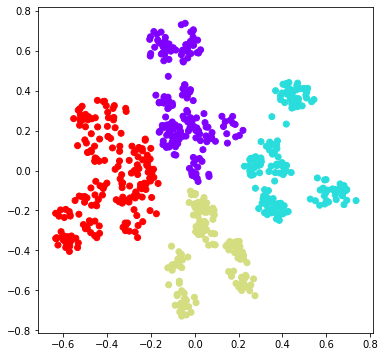

In [71]:
# Prepare X
X_cluster = NewCustomer
X_cluster.dropna(inplace=True)

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_cluster) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

X_normalized.head()

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

# K = 4
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

In [72]:
NewCustomer['cluster'] = ac4.fit_predict(X_principal)
NewCustomer_out['cluster'] = NewCustomer['cluster']

In [73]:
NewCustomer.head()

,gender,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,industry_Argiculture,industry_Entertainment,industry_Financial Services,industry_Health,...,industry_Property,industry_Retail,industry_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,state_NSW,state_QLD,state_VIC,cluster
0,0,86,1,1,14,60.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,69,1,0,16,47.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
2,1,10,1,0,10,43.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,3
3,1,64,1,1,5,38.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,3
4,1,34,1,0,19,52.0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [74]:
bins = [0, 16, 30, 45, 1000]
NewCustomer['age_group'] = pd.cut(NewCustomer['age'], bins)
labels = ["Child", "Young Adults", "Middle-aged Adults", "Old-aged Adults"]
NewCustomer['age_group'] = pd.cut(NewCustomer['age'], bins=bins, labels=labels)

In [75]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('KPMG_cluster.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df_out.to_excel(writer, sheet_name='OldCustomer', index=False)
NewCustomer_out.to_excel(writer, sheet_name='NewCustomer', index=False)


# Close the Pandas Excel writer and output the Excel file.
writer.save()

---
### Last but not least

After we got the cluster label, we can use Tableau to visualize each cluster attributes. Based on those attributes and features, we can make a proper marketing strategys.